<a href="https://colab.research.google.com/github/GDS-Education-Community-of-Practice/DSECOP-AAPT-Workshop-2024/blob/main/Notebooks/Intro_Physics_Simulating_Projectile_Motion_with_Drag.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Your Instructions

This code is designed to do everything we need it to do. Until we get to the parts where we are adjusting numbers (near the end of each section), you do not need to write any code. But you do need to make sure every code cell runs, because all the instructions we give the computer are necessary.

Depending on your time constraints and your interest in programming, you can do one of two things:

1. If you are interested in following along with the code, just scroll down slowly. Read the text cells and run the code cells by clicking the "play" button in the upper left hand corner. When you see a little checkmark and a number in brackets (e.g. [1]), you've successfully run the cells.

2. If you have no interest in how the code works, select from the header menu Runtime > Run all and give the code a minute to execute. Then jump down to [Projectile Motion without Drag](#nodragplots) and look at the figures. Talk with your neighbors about what each graph is telling you. Then scroll to the next section -- [Projectile Motion with Drag](#dragplots) -- and follow the instructions there. Finally, jump to the [end](#comparingcoefficients) where you can put your own data in and find the drag coefficient. Make sure you do the reflection and compare with another group.

# Importing packages

We are going to need to import some special tools to run this code. We can do that by telling the notebook to import the packages we need and give them certain nicknames (e.g. "import numpy as np" tells it to import numpy and call it "np" when we use it).

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generating time series data of projectile motion

In this notebook, we will explore projectile motion in some detail.
This topic is often treated in an idealized setting (no air resistance, perfectly spherical object, etc.).
Here, we will try to generate more realistic observations of projectile motion where there are a range of influences including variations in pressure, temperature, wind, and generally drag.
We will even consider imperfections in measurement as would be found in sensor based observations of an object in motion.

The goal of this exercise is to prepare a set of time-series data for many trajectories that we can subsequently analyze using standard time-series analysis tools.

## Projectile motion

From Newton's second law, we know that the acceleration of an object is determined by its mass and the forces acting on it:
$$
\vec{F} = m\vec{a}
$$
where $\vec{F}$ is the force, $m$ is the mass, and $\vec{a}$ is the acceleration.
For easy of plotting to see our results, we will consider a two dimensional world where $x$ represents the horizontal distance and $y$ represents the vertical height.
Thus, our forces and acceleration have a horizontal and vertical component:
$$
\vec{F} = F_{x}\ \hat{x} + F_{y}\ \hat{y} = m (a_{x}\ \hat{x} + a_{y}\ \hat{y})
$$

Now, for a projectile which has been propelled from the ground into the air, the only force that is considered in the idealized setting is gravity which only acts in the vertical component:

$$
\vec{F}_g = m(0\ \hat{x}-g\ \hat{y}).
$$

Let's begin by writing a program that can simulate the projectile motion under only this force.
To do so, we consider the position ($\vec{r}(t)$), velocity ($\vec{v}(t)$), and accleration ($\vec{a}(t)$) of the projectile, which are all functions of time $t$:

$$
\begin{align}
  \vec{a} &= \frac{d}{d t}\vec{v}\\
  \vec{y} &= \frac{d}{dt}\vec{r}.
\end{align}
$$

From this, we can write Newton's Second Law for projectile motion as:

$$
\begin{align}
\vec{a} &= \frac{1}{m}F_g \\
\vec{a} &= (0\ \hat{x}-g\ \hat{y})\\
\frac{d}{dt}\vec{v} & = (0\ \hat{x}-g\ \hat{y})\\
\frac{d^2}{dt^2}\vec{r} &= (0\ \hat{x}-g\ \hat{y})
\end{align}
$$

## Numerically solving projectile motion
In order to approximate the position as a function of time ($\vec{r}(t)$), we need to know our "initial conditions" (the starting position, velocity, and acceleration) of the object undergoing projectile motion. Acceleration is constant, which leaves position and velocity.

### Numerical Derivatives

We can use the definition of derivative to help us solve this problem numerically (using a computer rather than solving by hand). That definition is:

$$
\frac{d}{dt}f(t) = \lim_{\Delta t\to 0} \frac{f(t+\Delta t) - f(t)}{\Delta t}
$$

What we are going to do is to take $\Delta t$ to a very small number, rather than all the way to zero:

$$
\frac{d}{dt}f(t) \approx\frac{f(t+\Delta t) - f(t)}{\Delta t}
$$
This says that we can approximate our derivative using the equation above, and it's valid for very small values of $\Delta t$. The smaller we make $\Delta t$, the better our approximation (to a point), but also the longer it takes the code to run.

### Euler's Method

If we know something about the derivative of our function, we can use this numerical derivative definition to understand how the function evolves over time:

$$
\begin{align}
f'(t) & \approx\frac{f(t+\Delta t) - f(t)}{\Delta t}\\
f(t + \Delta t) &\approx f(t) + f'(t)\Delta t
\end{align}
$$

This should look familar. Remember our kinematics equations?

$$
\begin{align}
r_{f} & = r_{i} + v_{i} \Delta t + a (t_{f}^{2} - t_{i}^{2})\\
v_{f} &= v_{i} + a \Delta t \\
v_{f}^2 &= v_{i}^2 + 2 a \Delta x
\end{align}
$$

The second equation is exactly this -- but we can use an equals sign because the acceleration is a constant and not a function of time (it's a special case)

$$
\begin{align}
v(t + \Delta t) &\approx v(t) + a(t)\Delta t
\end{align}
$$

We can then apply the same formula to see how position changes if we know how velocity changes:

$$
\begin{align}
r(t + \Delta t) &\approx r(t) + v(t)\Delta t
\end{align}
$$

This is called "Euler's method."

# Coding Projectile Motion Without Drag

In [ ]:
# define our acceleration for projectile motion without drag
g = 9.8 #m/s^2

def acceleration(g):
  return [0,-1.*g]

#define a function that calculates velocity using Euler's method
def velocity(vi, a, dt):
  vf = vi + a * dt
  return vf


#define a function that calculates position using Euler's method
def position(ri, v, dt):
  rf = ri + v * dt
  return rf

In [ ]:
# define a function that will loop over a time interval and use Euler's method over each time step
def check_if_in_air(ry):
  if ry > 0:
    return True
  else:
    return False

def projectile_motion(ti, dt, ri, vi, ai, g):
  #create lists to store results
  time = [ti]
  ax = [ai[0]]
  ay = [ai[1]]
  vx = [vi[0]]
  vy = [vi[1]]
  rx = [ri[0]]
  ry = [ri[1]]

  #use Euler's method
  n = 1
  in_air = True
  while in_air:
    t = time[n-1]+dt
    time.append(t)
    a = np.array([ax[n-1],ay[n-1]])
    v = np.array([vx[n-1],vy[n-1]])
    r = np.array([rx[n-1],ry[n-1]])
    v_n = velocity(v,a,dt)
    vx.append(v_n[0])
    vy.append(v_n[1])
    r_n = position(r,v,dt)
    rx.append(r_n[0])
    ry.append(r_n[1])
    a_n = acceleration(g)
    ax.append(a_n[0])
    ay.append(a_n[1])
    in_air = check_if_in_air(ry[-1])
    n += 1
  #return the results we found
  return time, ax, ay, vx, vy, rx, ry

In [ ]:
# define functions to plot the motion

# plot the trajectory
def plot_trajectory(rx, ry):
  fig, axes = plt.subplots(1, 1,figsize = (6,4))
  sns.scatterplot(x=rx,y=ry)
  plt.axhline(y=0, color = "black")
  axes.set_title('x position v y position')
  plt.tight_layout()
  plt.show()

#plot the x and y positions, velocities, and accelerations as a function of time
def plot_components(t, ax, ay, vx, vy, rx, ry):
  fig, axes = plt.subplots(3, 2,figsize = (12,8))

  sns.scatterplot(ax = axes[0,0],x=t,y=vx)
  axes[0,0].set_title('x-velocity')

  sns.scatterplot(ax = axes[0,1],x=t,y=vy)
  axes[0,1].set_title('y-velocity')

  sns.scatterplot(ax = axes[1,0],x=t,y=rx)
  axes[1,0].set_title('x-position')

  sns.scatterplot(ax = axes[1,1],x=t,y=ry)
  axes[1,1].set_title('y-position')

  sns.scatterplot(ax = axes[2,0],x=t,y=ax)
  axes[2,0].set_title('x-acceleration')

  sns.scatterplot(ax = axes[2,1],x=t,y=ay)
  axes[2,1].set_title('y-acceleration')

  plt.tight_layout()
  plt.show()




## Plotting Projectile Motion Without Drag <a name="nodragplots"></a>

The code below plots projectile motion without drag.

Try changing around the initial conditions below and see how the plots change.

In [ ]:
# choose our initial conditions -- change the values here however you'd like!
ti = 0.0 #s
rix = 0.0 #m
riy = 0.0 #m
theta = 30 #degrees
v_init = 20 #m/s

# set other conditions  -- don't change anything below this comment
dt = 0.01 #s
vix = v_init*np.cos(np.deg2rad(theta)) #m/s
viy = v_init*np.sin(np.deg2rad(theta)) #m/s
aix = 0.0 #m/s^2
aiy = -g #m/s^2
ri = [rix, riy]
vi = [vix, viy]
ai = [aix, aiy]

# run the projectile motion function
t, ax, ay, vx, vy, rx, ry = projectile_motion(ti, dt, ri, vi, ai, g)

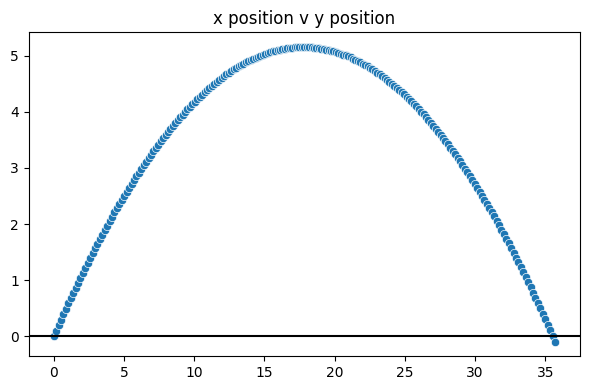

In [ ]:
plot_trajectory(rx, ry)

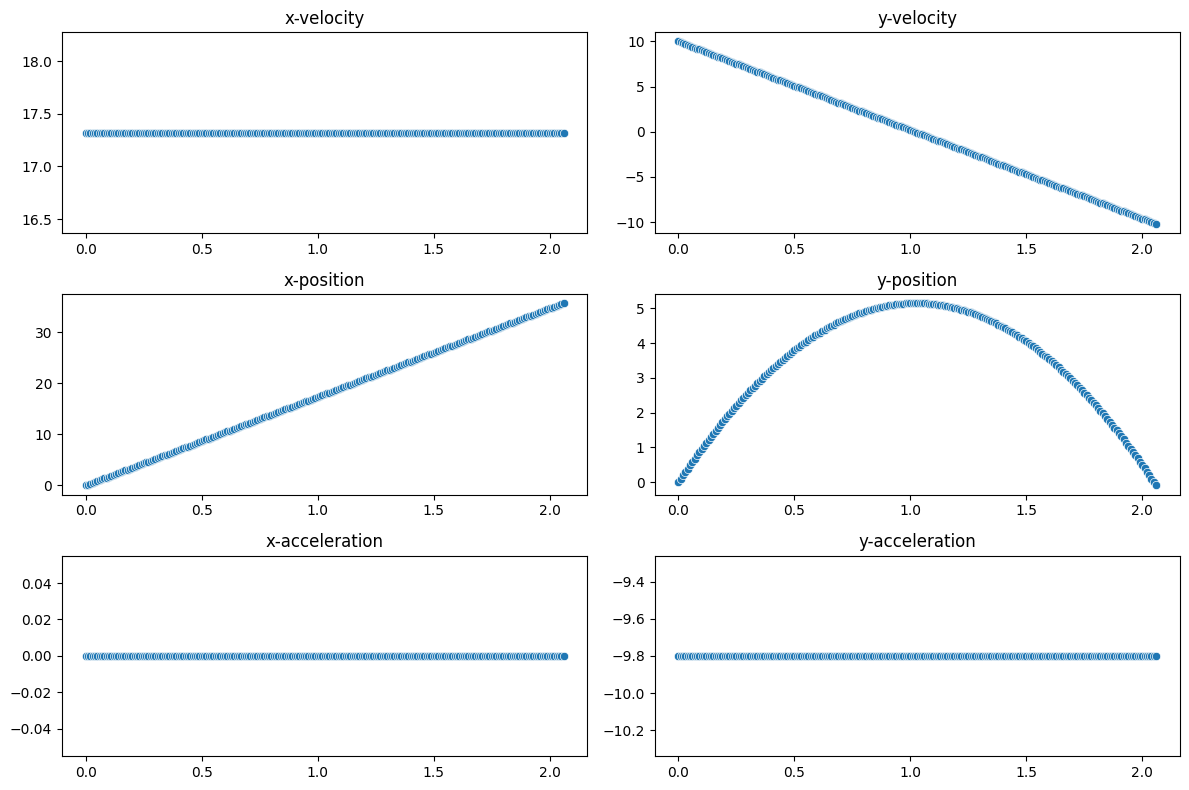

In [ ]:
plot_components(t, ax, ay, vx, vy, rx, ry)

# Coding Projectile Motion with Drag

The most common additional force beyond gravity is to incorporate "drag." This drag force will oppose the motion of the object, slowing it down.

The equation for the drag force exerted is written:

$$
\vec{F}_d = \frac{1}{2}\rho\vec{v}^2c_dA
$$

where $\rho$ is the density of the air/fluid, $c_d$ is the drag coefficient (based on the projectile shape and material properties), and $A$ is the area of the projectile surface which is exerting force on the air/fluid.

Although this equation initially appears simple, it's components can be very complex.
For example,
1. $\rho$ - the density varies with temperature, pressure, and humidity, but generally we can consider the air density near the surface of the earth to be [1.293 kg/m^3](https://www.earthdata.nasa.gov/topics/atmosphere/atmospheric-pressure/air-mass-density#:~:text=Pure%2C%20dry%20air%20has%20a,a%20pressure%20of%20101.325%20kPa.)
1. $c_d$ - the drag coefficient depends on the material properties, the surface area in the direction of movement, and the fluid properties. **The value of this coefficient is what you will be trying to determine.**

Though we will not consider the full complexity of this drag, we can consider some cases for projectile motion through the air.
Doing so, we can add the drag force to our equation for Newton's 2nd Law:

$$
\begin{align}
\vec{a} &= \frac{1}{m}(\vec{F}_g + \vec{F}_d) \\
\vec{a} &= (0 -  \frac{\rho c_d A}{2m}v_x^2 )\hat{x} - ( g + \frac{\rho c_d A}{2m}v_y^2)\hat{y}
.\end{align}
$$

This means our acceleration now depends on velocity, where before it was a constant.

In [ ]:
# define our acceleration for projectile motion with drag - note that we can use the same position and velocity calculations, only a will change

def acceleration_drag(g, rho, c_d, A, m, vi):
  a_g = acceleration(g)
  a_drag = -1.*(rho * c_d * A)/(2. * m) *np.square(vi)
  a = a_g + a_drag
  return a

In [ ]:
def projectile_motion_drag(ti, dt, ri, vi, ai, g, rho, A, m, c_d):
  #create lists to store results
  time = [ti]
  ax = [ai[0]]
  ay = [ai[1]]
  vx = [vi[0]]
  vy = [vi[1]]
  rx = [ri[0]]
  ry = [ri[1]]

  #use Euler's method
  n = 1
  in_air = True
  while in_air:
    t = time[n-1]+dt
    time.append(t)
    a = np.array([ax[n-1],ay[n-1]])
    v = np.array([vx[n-1],vy[n-1]])
    r = np.array([rx[n-1],ry[n-1]])
    v_n = velocity(v,a,dt)
    vx.append(v_n[0])
    vy.append(v_n[1])
    r_n = position(r,v,dt)
    rx.append(r_n[0])
    ry.append(r_n[1])
    a_n = acceleration_drag(g, rho, c_d, A, m, v_n)
    ax.append(a_n[0])
    ay.append(a_n[1])
    in_air = check_if_in_air(ry[-1])
    n += 1
  #return the results we found
  return time, ax, ay, vx, vy, rx, ry

## Plotting Projectile Motion With Drag  <a name="dragplots"></a>

We are going to use our data from shooting tennis balls to try to estimate the drag coefficient. Let's start by determining the other constants that go into the drag equation.

First, what is the cross-sectional area of a tennis ball? The average tennis ball diameter is about $6.75 cm$, so we can use the equation for the cross-sectional area (just the area of a circle with the same radius)

$$ A = \pi R^2$$

where $R = 0.03375 m$.

The average mass of a tennis ball is $57\ g$, so we need to put that into SI units of kg.

We already know air density, as it was given above as $1.293 kg/ m^3$

The only remaining constant is the drag coefficient. I've put in 0.0 for now, so go ahead and play around with that number and your initial conditions to see how it changes the graphs below.

In [ ]:
#set the drag coefficient
c_d = 0.1

#set initial conditions
ti = 0.0 #s
rix = 0.0 #m
riy = 0.0 #m
theta = 30 #degrees
v_init = 20 #m/s

#set other constants -- only change these if you want to see how other objects might move differently with air drag
A = np.pi * (0.03375)**2 #m^2
m = 0.058 #kg

# set other conditions  -- don't change anything below this comment
rho = 1.293 #kg/m^3
dt = 0.01 #s
vix = v_init*np.cos(np.deg2rad(theta)) #m/s
viy = v_init*np.sin(np.deg2rad(theta)) #m/s
ai = acceleration_drag(g, rho, c_d, A, m, np.array([vix,viy]))
aix = ai[0]
aiy = ai[1]
ri = [rix, riy]
vi = [vix, viy]
ai = [aix, aiy]

#run the projectile motion simulation
t, ax, ay, vx, vy, rx, ry = projectile_motion_drag(ti, dt, ri, vi, ai, g, rho, A, m, c_d)


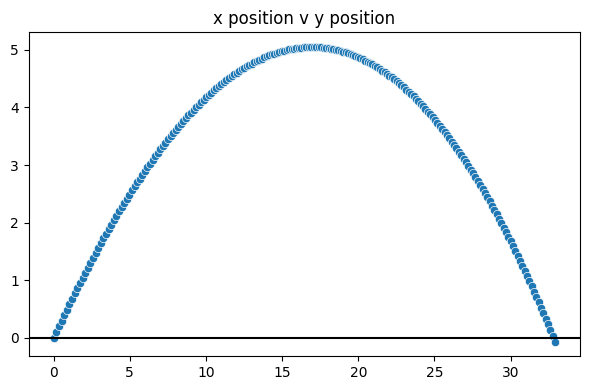

In [ ]:
plot_trajectory(rx, ry)

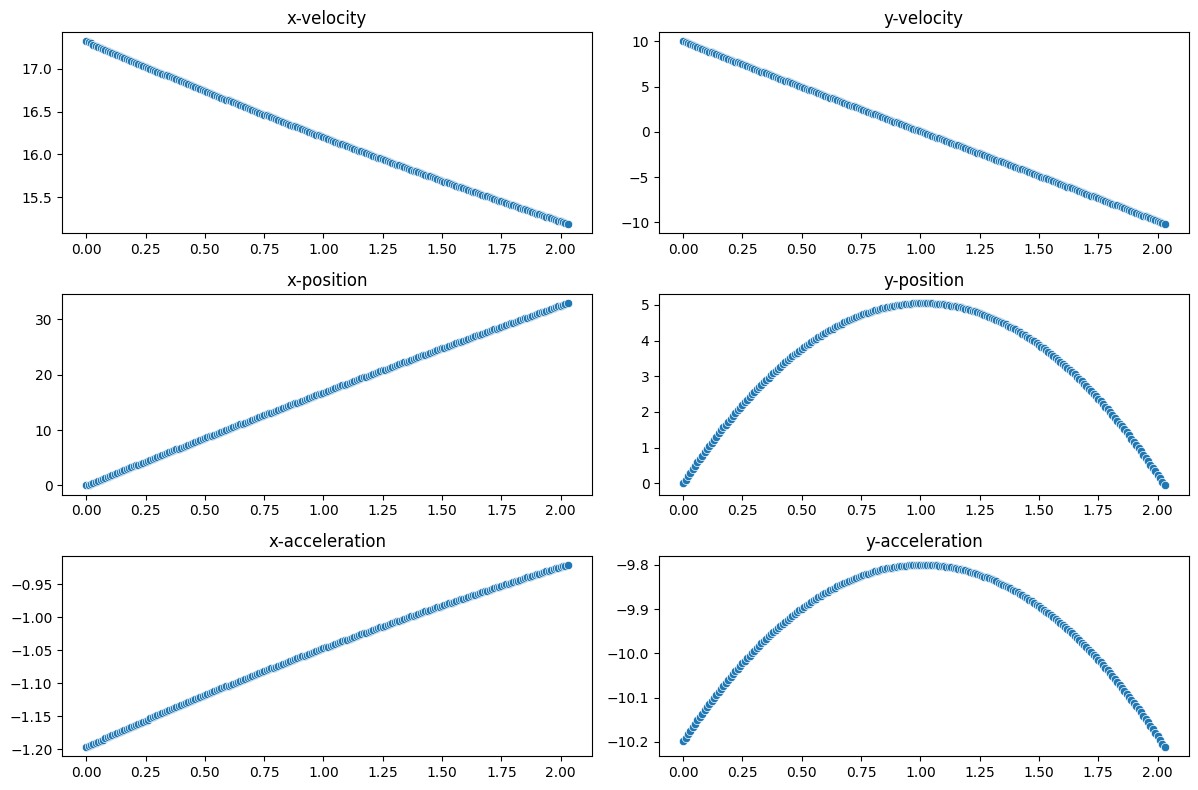

In [ ]:
plot_components(t, ax, ay, vx, vy, rx, ry)

# Comparing Drag Coefficients  <a name="comparingcoefficients"></a>

The first thing we are going to do is define some functions that will let us plot multiple scenarios side by side:

In [ ]:
import pandas as pd #this is a way of storing and organizing data

def compare_trajectories(ri, vi, ai, g, rho, A, m, drag_coefficients):
  t, ax, ay, vx, vy, rx, ry = projectile_motion_drag(ti, dt, ri, vi, ai, g, rho, A, m, 0.)
  c_drag = 0.0*np.ones_like(t)
  no_drag = {"t (s)": t, "a_x (m/s^2)": ax, "a_y (m/s^2)": ay, "v_x (m/s)": vx, "v_y (m/s)": vy, "x (m)": rx, "y (m)": ry, "drag coefficient": c_drag }
  df = pd.DataFrame(data = no_drag)
  for c_d in drag_coefficients:
    t, ax, ay, vx, vy, rx, ry = projectile_motion_drag(ti, dt, ri, vi, ai, g, rho, A, m, c_d)
    c_drag = c_d*np.ones_like(t)
    temp = {"t (s)": t, "a_x (m/s^2)": ax, "a_y (m/s^2)": ay, "v_x (m/s)": vx, "v_y (m/s)": vy, "x (m)": rx, "y (m)": ry, "drag coefficient": c_drag }
    df2 = pd.DataFrame(data = temp)
    df = pd.concat([df, df2])
  df = df.reset_index(drop=True)
  return df

We're also going to write a function that will make the appropriate plots we need for this.

In [ ]:
def plot_with_drag(projectile_data, final_coords):

  sns.relplot(data = projectile_data, x = "x (m)", y = "y (m)", hue = "drag coefficient", palette = "rocket_r", height=4, aspect=3, alpha = 0.75)
  plt.show()

  fig, axes = plt.subplots(1, 2,figsize = (12,4))

  sns.scatterplot(ax = axes[0], data = final_coords, x = "drag coefficient", y = "x (m)")
  axes[0].set_title('distance travelled')

  sns.scatterplot(ax = axes[1], data = final_coords, x = "drag coefficient", y = "t (s)")
  axes[1].set_title('time in air')
  plt.show()



## Interpreting the data for different drag coefficients

comparingcoefficients

You can visualize the different trajectories with different drag coefficients here. First, choose one of the tennis ball launches and match the initial conditions to that particular launch:

In [ ]:
rix = 0.0 #m
riy = 0.0 #m
theta = 30 #degrees
v_init = 20 #m/s

Now, make an array of different drag coefficients. You do this by creating a list inside square brackets, for example:

```
drag_coefficients = [0.1,0.3,0.5,0.7,0.9,1.1]
```

Go ahead and make a list like that at the top of the code block below. You can include as many as you want, just know that the more you include, the longer the code will take to run, and the messier your plot will be.

In [ ]:
#make an array of drag coefficients (don't include 0)
drag_coefficients = [0.1,0.5,1,2,3,5,10]

#set other initial conditions and run the code -- don't change any of this
ti = 0.0 #s
dt = 0.01 #s
vix = v_init*np.cos(np.deg2rad(theta)) #m/s
viy = v_init*np.sin(np.deg2rad(theta)) #m/s
ai = acceleration_drag(g, rho, c_d, A, m, np.array([vix,viy]))
aix = ai[0]
aiy = ai[1]

ri = [rix, riy]
vi = [vix, viy]
ai = [aix, aiy]

projectile_data = compare_trajectories(ri, vi, ai, g, rho, A, m, drag_coefficients)

### Examining the data

To see $x_f$ for each different drag coefficient, we can find the largest value of x for each drag coefficient. We can do this by grouping the data by drag coefficients.

In [ ]:
final_coords = projectile_data[["x (m)", "t (s)", "drag coefficient"]].groupby(["drag coefficient"]).max()

In [ ]:
final_coords

,x (m),t (s)
drag coefficient,,
0.0,35.655716,2.06
0.1,32.913047,2.03
0.5,25.687874,1.93
1.0,20.590382,1.83
2.0,15.163870,1.68
3.0,12.179294,1.56
5.0,8.936207,1.39
10.0,5.609554,1.15


Do any of these final x values match your actual data from the lab? Which are closest? Keep adjusting your drag coefficients to see if you can find something that makes sense.

### Visualizing the data

Let's plot the trajectories for the different drag coefficients, and compare the distance traveled and the time in the air for different coefficients. The function below does all of those things.

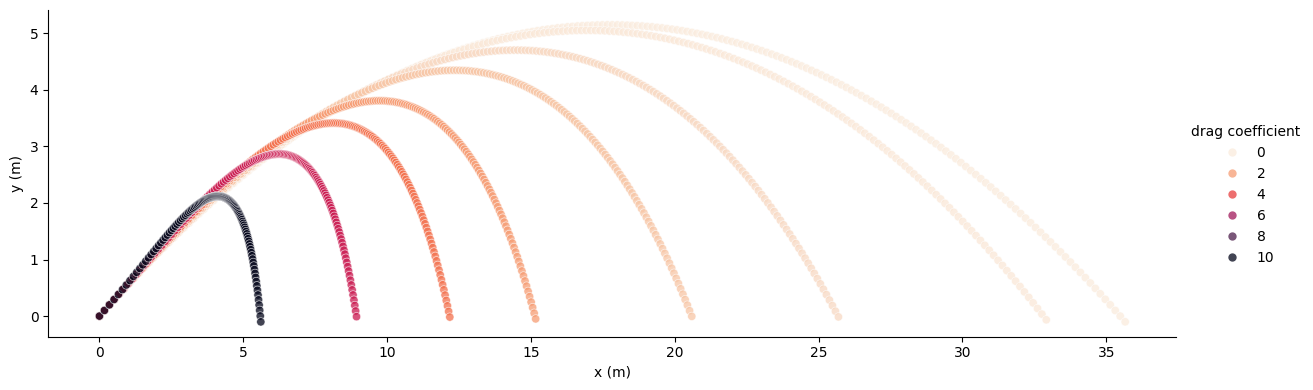

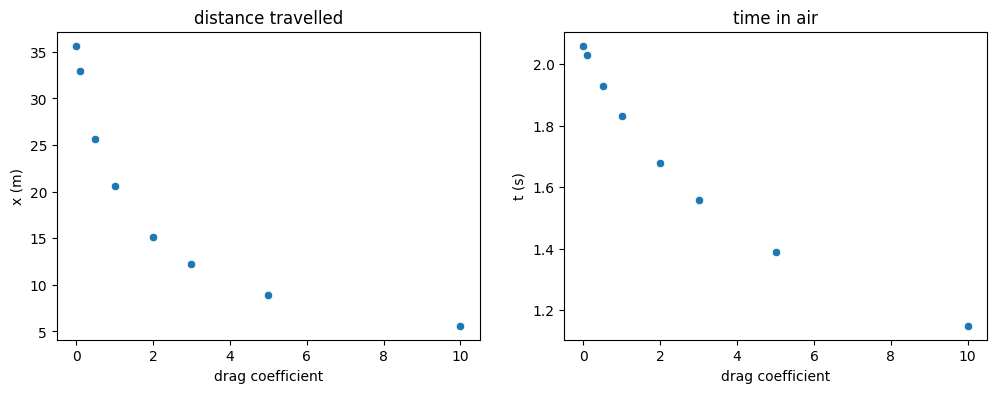

In [ ]:
plot_with_drag(projectile_data, final_coords)

# Reflection

Take the results you found and compare your drag coefficients with another group that used a different launch. Look at the dataframes and the visualizations, and talk through the following:

Do you have similar drag coefficients? Do those drag coefficients seem reasonable? What if I told you [the average drag coefficient for a tennis ball was around 0.5?](https://twu.tennis-warehouse.com/learning_center/aerodynamics2.php)

What factors (other than drag) could have caused changes in the ball's trajectory?